In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install geopandas
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

C:\Users\rites\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Loading

In [2]:
df = pd.read_csv('Agriculture.csv')
df

state        district      market              commodity  \
0     Andaman and Nicobar   South Andaman  Port Blair             Amaranthus   
1     Andaman and Nicobar   South Andaman  Port Blair         Banana - Green   
2     Andaman and Nicobar   South Andaman  Port Blair  Bhindi(Ladies Finger)   
3     Andaman and Nicobar   South Andaman  Port Blair           Bitter gourd   
4     Andaman and Nicobar   South Andaman  Port Blair           Black pepper   
...                   ...             ...         ...                    ...   
2233          West Bengal  Uttar Dinajpur    Islampur                 Potato   
2234          West Bengal  Uttar Dinajpur    Islampur                   Rice   
2235          West Bengal  Uttar Dinajpur     Raiganj                   Jute   
2236          West Bengal  Uttar Dinajpur     Raiganj                   Rice   
2237          West Bengal  Uttar Dinajpur     Raiganj                  Wheat   

             variety arrival_date  min_price  max_price  modal_price  
0         Amaranthus   04/03/2019       6000       8000         7000  
1     Banana - Green   04/03/2019       4500       5500         5000  
2             Bhindi   04/03/2019       6000       8000         7000  
3              Other   04/03/2019       6000       8000         7000  
4              Other   04/03/2019     110000     130000       120000  
...              ...          ...        ...        ...          ...  
2233           Jyoti   04/03/2019        530        570          550  
2234           Other   04/03/2019       3550       3650         3600  
2235            TD-5   04/03/2019       4400       4600         4500  
2236           Other   04/03/2019       3450       3550         3500  
2237          Kalyan   04/03/2019       2075       2125         2100  

[2238 rows x 9 columns]

# Data cleaning

In [3]:
df.dtypes

state           object
district        object
market          object
commodity       object
variety         object
arrival_date    object
min_price        int64
max_price        int64
modal_price      int64
dtype: object

In [4]:
df['arrival_date']

0       04/03/2019
1       04/03/2019
2       04/03/2019
3       04/03/2019
4       04/03/2019
           ...    
2233    04/03/2019
2234    04/03/2019
2235    04/03/2019
2236    04/03/2019
2237    04/03/2019
Name: arrival_date, Length: 2238, dtype: object

In [5]:
df['arrival_date'].unique().sum()

'04/03/2019'

In [6]:
# Convert arrival_date to datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%d/%m/%Y')
df

state        district      market              commodity  \
0     Andaman and Nicobar   South Andaman  Port Blair             Amaranthus   
1     Andaman and Nicobar   South Andaman  Port Blair         Banana - Green   
2     Andaman and Nicobar   South Andaman  Port Blair  Bhindi(Ladies Finger)   
3     Andaman and Nicobar   South Andaman  Port Blair           Bitter gourd   
4     Andaman and Nicobar   South Andaman  Port Blair           Black pepper   
...                   ...             ...         ...                    ...   
2233          West Bengal  Uttar Dinajpur    Islampur                 Potato   
2234          West Bengal  Uttar Dinajpur    Islampur                   Rice   
2235          West Bengal  Uttar Dinajpur     Raiganj                   Jute   
2236          West Bengal  Uttar Dinajpur     Raiganj                   Rice   
2237          West Bengal  Uttar Dinajpur     Raiganj                  Wheat   

             variety arrival_date  min_price  max_price  modal_price  
0         Amaranthus   2019-03-04       6000       8000         7000  
1     Banana - Green   2019-03-04       4500       5500         5000  
2             Bhindi   2019-03-04       6000       8000         7000  
3              Other   2019-03-04       6000       8000         7000  
4              Other   2019-03-04     110000     130000       120000  
...              ...          ...        ...        ...          ...  
2233           Jyoti   2019-03-04        530        570          550  
2234           Other   2019-03-04       3550       3650         3600  
2235            TD-5   2019-03-04       4400       4600         4500  
2236           Other   2019-03-04       3450       3550         3500  
2237          Kalyan   2019-03-04       2075       2125         2100  

[2238 rows x 9 columns]

In [7]:
df.isnull().sum() #no null values

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
df[df.duplicated()]

state    district market commodity variety arrival_date  min_price  \
1024  Odisha  Sundergarh  Bonai    Orange   Other   2019-03-04       8000   
1025  Odisha  Sundergarh  Bonai    Orange   Other   2019-03-04       8000   

      max_price  modal_price  
1024       8000         8000  
1025       8000         8000

In [10]:
df.drop_duplicates(inplace=True)
df

state        district      market              commodity  \
0     Andaman and Nicobar   South Andaman  Port Blair             Amaranthus   
1     Andaman and Nicobar   South Andaman  Port Blair         Banana - Green   
2     Andaman and Nicobar   South Andaman  Port Blair  Bhindi(Ladies Finger)   
3     Andaman and Nicobar   South Andaman  Port Blair           Bitter gourd   
4     Andaman and Nicobar   South Andaman  Port Blair           Black pepper   
...                   ...             ...         ...                    ...   
2233          West Bengal  Uttar Dinajpur    Islampur                 Potato   
2234          West Bengal  Uttar Dinajpur    Islampur                   Rice   
2235          West Bengal  Uttar Dinajpur     Raiganj                   Jute   
2236          West Bengal  Uttar Dinajpur     Raiganj                   Rice   
2237          West Bengal  Uttar Dinajpur     Raiganj                  Wheat   

             variety arrival_date  min_price  max_price  modal_price  
0         Amaranthus   2019-03-04       6000       8000         7000  
1     Banana - Green   2019-03-04       4500       5500         5000  
2             Bhindi   2019-03-04       6000       8000         7000  
3              Other   2019-03-04       6000       8000         7000  
4              Other   2019-03-04     110000     130000       120000  
...              ...          ...        ...        ...          ...  
2233           Jyoti   2019-03-04        530        570          550  
2234           Other   2019-03-04       3550       3650         3600  
2235            TD-5   2019-03-04       4400       4600         4500  
2236           Other   2019-03-04       3450       3550         3500  
2237          Kalyan   2019-03-04       2075       2125         2100  

[2236 rows x 9 columns]

In [11]:
df.duplicated().sum()

0

In [12]:
# Find rows where minimum price is greater than maximum price
price_inconsistent = df[df['min_price'] > df['max_price']]
price_inconsistent

state district               market             commodity  \
279  Himachal Pradesh   Kangra  Kangra(Jaisinghpur)               Spinach   
326  Himachal Pradesh   Kangra             Palampur                 Lemon   
328  Himachal Pradesh   Kangra             Palampur  Mousambi(Sweet Lime)   

    variety arrival_date  min_price  max_price  modal_price  
279   Other   2019-03-04       1400          0         1500  
326   Other   2019-03-04       5000          0         5500  
328   Other   2019-03-04       5000          0         5500

In [13]:
zero_max = df[df['max_price'] == 0]
zero_max

state       district               market  \
279   Himachal Pradesh         Kangra  Kangra(Jaisinghpur)   
326   Himachal Pradesh         Kangra             Palampur   
328   Himachal Pradesh         Kangra             Palampur   
1914     Uttar Pradesh  Muzaffarnagar              Shahpur   
1915     Uttar Pradesh  Muzaffarnagar              Shahpur   
1916     Uttar Pradesh  Muzaffarnagar              Shahpur   
1917     Uttar Pradesh  Muzaffarnagar              Shahpur   
1918     Uttar Pradesh  Muzaffarnagar              Shahpur   
1919     Uttar Pradesh  Muzaffarnagar              Shahpur   
1920     Uttar Pradesh  Muzaffarnagar              Shahpur   
1921     Uttar Pradesh  Muzaffarnagar              Shahpur   
1922     Uttar Pradesh  Muzaffarnagar              Shahpur   
1923     Uttar Pradesh  Muzaffarnagar              Shahpur   
1924     Uttar Pradesh  Muzaffarnagar              Shahpur   

                 commodity       variety arrival_date  min_price  max_price  \
279                Spinach         Other   2019-03-04       1400          0   
326                  Lemon         Other   2019-03-04       5000          0   
328   Mousambi(Sweet Lime)         Other   2019-03-04       5000          0   
1914                 Apple         Apple   2019-03-04          0          0   
1915          Bottle gourd  Bottle Gourd   2019-03-04          0          0   
1916                Carrot        Carrot   2019-03-04          0          0   
1917          Green Chilli  Green Chilly   2019-03-04          0          0   
1918          Gur(Jaggery)        Yellow   2019-03-04          0          0   
1919                 Onion         Onion   2019-03-04          0          0   
1920                  Plum          Plum   2019-03-04          0          0   
1921               Pumpkin       Pumpkin   2019-03-04          0          0   
1922               Raddish       Raddish   2019-03-04          0          0   
1923                  Rice        Common   2019-03-04          0          0   
1924                 Wheat         Other   2019-03-04          0          0   

      modal_price  
279          1500  
326          5500  
328          5500  
1914         2600  
1915          420  
1916          490  
1917         1005  
1918         2240  
1919          980  
1920          570  
1921          400  
1922          330  
1923         3900  
1924         1900

In [14]:
zero_min = df[df['min_price'] == 0]
zero_min

state           district               market  \
278   Himachal Pradesh             Kangra  Kangra(Jaisinghpur)   
888            Manipur          Bishnupur            Bishenpur   
902            Manipur            Chandel                Moreh   
911            Manipur        Imphal East       Lamlong Bazaar   
913            Manipur        Imphal East       Lamlong Bazaar   
917            Manipur        Imphal West               Imphal   
922            Manipur        Imphal West               Imphal   
928            Manipur            Thoubal              Thoubal   
933            Manipur            Thoubal              Thoubal   
934            Manipur            Thoubal              Thoubal   
938            Manipur            Thoubal              Thoubal   
1743     Uttar Pradesh  Gautam Budh Nagar                Javer   
1744     Uttar Pradesh  Gautam Budh Nagar                Javer   
1745     Uttar Pradesh  Gautam Budh Nagar                Javer   
1746     Uttar Pradesh  Gautam Budh Nagar                Javer   
1747     Uttar Pradesh  Gautam Budh Nagar                Javer   
1748     Uttar Pradesh  Gautam Budh Nagar                Javer   
1914     Uttar Pradesh      Muzaffarnagar              Shahpur   
1915     Uttar Pradesh      Muzaffarnagar              Shahpur   
1916     Uttar Pradesh      Muzaffarnagar              Shahpur   
1917     Uttar Pradesh      Muzaffarnagar              Shahpur   
1918     Uttar Pradesh      Muzaffarnagar              Shahpur   
1919     Uttar Pradesh      Muzaffarnagar              Shahpur   
1920     Uttar Pradesh      Muzaffarnagar              Shahpur   
1921     Uttar Pradesh      Muzaffarnagar              Shahpur   
1922     Uttar Pradesh      Muzaffarnagar              Shahpur   
1923     Uttar Pradesh      Muzaffarnagar              Shahpur   
1924     Uttar Pradesh      Muzaffarnagar              Shahpur   

                        commodity          variety arrival_date  min_price  \
278                       Raddish          Raddish   2019-03-04          0   
888   Bengal Gram Dal (Chana Dal)  Bengal Gram Dal   2019-03-04          0   
902                     Masur Dal        Masur Dal   2019-03-04          0   
911                     Masur Dal        Masur Dal   2019-03-04          0   
913           Paddy(Dhan)(Common)            Other   2019-03-04          0   
917   Bengal Gram Dal (Chana Dal)  Bengal Gram Dal   2019-03-04          0   
922                     Masur Dal        Masur Dal   2019-03-04          0   
928   Bengal Gram Dal (Chana Dal)  Bengal Gram Dal   2019-03-04          0   
933                     Masur Dal        Masur Dal   2019-03-04          0   
934                         Onion            Other   2019-03-04          0   
938                Turmeric (raw)   Turmeric (raw)   2019-03-04          0   
1743                      Brinjal            Other   2019-03-04          0   
1744                      Cabbage          Cabbage   2019-03-04          0   
1745                       Carrot           Carrot   2019-03-04          0   
1746                 Green Chilli     Green Chilly   2019-03-04          0   
1747                       Potato           Potato   2019-03-04          0   
1748                       Tomato            Other   2019-03-04          0   
1914                        Apple            Apple   2019-03-04          0   
1915                 Bottle gourd     Bottle Gourd   2019-03-04          0   
1916                       Carrot           Carrot   2019-03-04          0   
1917                 Green Chilli     Green Chilly   2019-03-04          0   
1918                 Gur(Jaggery)           Yellow   2019-03-04          0   
1919                        Onion            Onion   2019-03-04          0   
1920                         Plum             Plum   2019-03-04          0   
1921                      Pumpkin          Pumpkin   2019-03-04          0   
1922                      Raddish          Raddish   2019-03-04          0

In [15]:
zero_modal = df[df['modal_price'] == 0]
zero_modal

Empty DataFrame
Columns: [state, district, market, commodity, variety, arrival_date, min_price, max_price, modal_price]
Index: []

In [16]:
#Drop all the row which has min_price, max_price and model price that have zero values

df = df[~((df['min_price'] == 0) | (df['max_price'] == 0) | (df['modal_price'] == 0))]
df

state        district      market              commodity  \
0     Andaman and Nicobar   South Andaman  Port Blair             Amaranthus   
1     Andaman and Nicobar   South Andaman  Port Blair         Banana - Green   
2     Andaman and Nicobar   South Andaman  Port Blair  Bhindi(Ladies Finger)   
3     Andaman and Nicobar   South Andaman  Port Blair           Bitter gourd   
4     Andaman and Nicobar   South Andaman  Port Blair           Black pepper   
...                   ...             ...         ...                    ...   
2233          West Bengal  Uttar Dinajpur    Islampur                 Potato   
2234          West Bengal  Uttar Dinajpur    Islampur                   Rice   
2235          West Bengal  Uttar Dinajpur     Raiganj                   Jute   
2236          West Bengal  Uttar Dinajpur     Raiganj                   Rice   
2237          West Bengal  Uttar Dinajpur     Raiganj                  Wheat   

             variety arrival_date  min_price  max_price  modal_price  
0         Amaranthus   2019-03-04       6000       8000         7000  
1     Banana - Green   2019-03-04       4500       5500         5000  
2             Bhindi   2019-03-04       6000       8000         7000  
3              Other   2019-03-04       6000       8000         7000  
4              Other   2019-03-04     110000     130000       120000  
...              ...          ...        ...        ...          ...  
2233           Jyoti   2019-03-04        530        570          550  
2234           Other   2019-03-04       3550       3650         3600  
2235            TD-5   2019-03-04       4400       4600         4500  
2236           Other   2019-03-04       3450       3550         3500  
2237          Kalyan   2019-03-04       2075       2125         2100  

[2205 rows x 9 columns]

# outliers removal

In [17]:
# Calculate thresholds
price_cols = ['min_price', 'max_price', 'modal_price']
Q1 = df[price_cols].quantile(0.01)
Q99 = df[price_cols].quantile(0.99)
print(Q1)
print(Q99)

min_price       8.00
max_price      12.32
modal_price    10.08
Name: 0.01, dtype: float64
min_price      10626.56
max_price      12000.00
modal_price    11255.52
Name: 0.99, dtype: float64


In [18]:
# Filter Out Outlier

df_no_outliers = df[
    (df['min_price'] >= Q1['min_price']) & (df['min_price'] <= Q99['min_price']) &
    (df['max_price'] >= Q1['max_price']) & (df['max_price'] <= Q99['max_price']) &
    (df['modal_price'] >= Q1['modal_price']) & (df['modal_price'] <= Q99['modal_price'])
]
df_no_outliers

state        district      market              commodity  \
0     Andaman and Nicobar   South Andaman  Port Blair             Amaranthus   
1     Andaman and Nicobar   South Andaman  Port Blair         Banana - Green   
2     Andaman and Nicobar   South Andaman  Port Blair  Bhindi(Ladies Finger)   
3     Andaman and Nicobar   South Andaman  Port Blair           Bitter gourd   
5     Andaman and Nicobar   South Andaman  Port Blair           Bottle gourd   
...                   ...             ...         ...                    ...   
2233          West Bengal  Uttar Dinajpur    Islampur                 Potato   
2234          West Bengal  Uttar Dinajpur    Islampur                   Rice   
2235          West Bengal  Uttar Dinajpur     Raiganj                   Jute   
2236          West Bengal  Uttar Dinajpur     Raiganj                   Rice   
2237          West Bengal  Uttar Dinajpur     Raiganj                  Wheat   

             variety arrival_date  min_price  max_price  modal_price  
0         Amaranthus   2019-03-04       6000       8000         7000  
1     Banana - Green   2019-03-04       4500       5500         5000  
2             Bhindi   2019-03-04       6000       8000         7000  
3              Other   2019-03-04       6000       8000         7000  
5              Other   2019-03-04       3000       4000         3500  
...              ...          ...        ...        ...          ...  
2233           Jyoti   2019-03-04        530        570          550  
2234           Other   2019-03-04       3550       3650         3600  
2235            TD-5   2019-03-04       4400       4600         4500  
2236           Other   2019-03-04       3450       3550         3500  
2237          Kalyan   2019-03-04       2075       2125         2100  

[2155 rows x 9 columns]

# Data visualization 

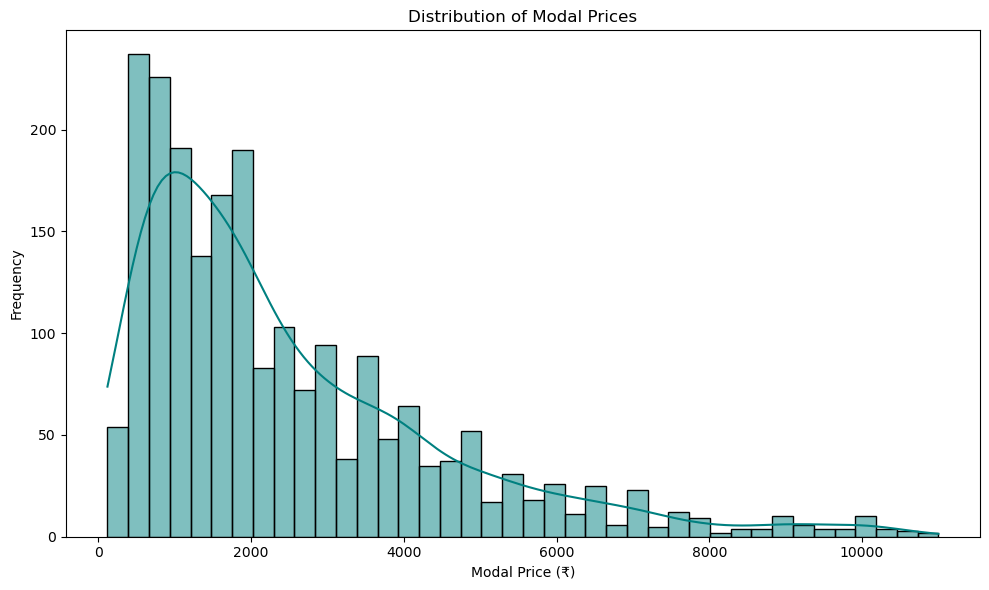

In [19]:
# Distribution of Modal Price

plt.figure(figsize=(10,6))

sns.histplot(df_no_outliers['modal_price'], bins=40, kde=True, color='teal')

plt.title('Distribution of Modal Prices')
plt.xlabel('Modal Price (₹)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [20]:
#Top Commodities by Frequency 
top_commodities = df_no_outliers['commodity'].value_counts().head(15)

plt.figure(figsize=(10,6))

sns.barplot(x=top_commodities.values, y=top_commodities.index, palette='viridis')

plt.title('Top 15 Commodities by Occurrence')
plt.xlabel('Number of Records')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

# observation: Potato is most commonly growing commodity in india accoding to this dataset

In [21]:
#District-wise Commodity Diversity
commodity_diversity = df_no_outliers.groupby('district')['commodity'].nunique().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))

sns.barplot(x=commodity_diversity.values, y=commodity_diversity.index, palette='cubehelix')

plt.title('Top 15 Districts by Commodity Diversity')
plt.xlabel('Unique Commodities')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# observation: Pune has the most divers commodities

# Grouping dataset

In [22]:
def generate_market_summary(dataframe):
    summary = dataframe.groupby(['state', 'district', 'market']).agg({
        'commodity': 'nunique',
        'variety': 'nunique',
        'modal_price': ['mean', 'std'],
        'max_price': 'mean',
        'min_price': 'mean'
    }).reset_index()
    
    summary.columns = ['state', 'district', 'market', 'unique_commodities', 
                       'unique_varieties', 'avg_modal_price', 'std_modal_price',
                       'avg_max_price', 'avg_min_price']
    return summary

market_summary_with_outliers = generate_market_summary(df)
market_summary = generate_market_summary(df_no_outliers)

- commodity: nunique tells us how many different types of crops a market handles. More variety = higher importance, more farmers, better reach.
- variety: nunique goes deeper to see how granular the supply is. For example, a market might sell only potatoes, but if it carries 5 distinct potato varieties, that's a signal of specialization or crop richness.
- Local markets (low variety, few commodities)
- Regional hubs (high variety, diverse crops
- modal_price.mean shows average earnings for commodities—a proxy for market value.
- modal_price.std reflects price stability. A high standard deviation could suggest fluctuating demand or unstable supply
- max_price.mean / min_price.mean help round out the pricing behavior in each market.

In [23]:
market_summary

state            district             market  \
0    Andaman and Nicobar       South Andaman         Port Blair   
1         Andhra Pradesh             Chittor           Kalikiri   
2         Andhra Pradesh             Chittor    Mulakalacheruvu   
3         Andhra Pradesh             Chittor         Vayalapadu   
4         Andhra Pradesh             Kurnool      Banaganapalli   
..                   ...                 ...                ...   
318          West Bengal            Puruliya         Balarampur   
319          West Bengal            Puruliya            Purulia   
320          West Bengal  Sounth 24 Parganas  Baruipur(Canning)   
321          West Bengal      Uttar Dinajpur           Islampur   
322          West Bengal      Uttar Dinajpur            Raiganj   

     unique_commodities  unique_varieties  avg_modal_price  std_modal_price  \
0                    14                 6      6507.142857      2438.620129   
1                     1                 1       620.000000              NaN   
2                     1                 1       300.000000              NaN   
3                     1                 1       760.000000              NaN   
4                     3                 3      2816.666667      1544.614299   
..                  ...               ...              ...              ...   
318                   9                 1      3067.777778      3071.619189   
319                  11                 6      3622.727273      3387.057989   
320                  11                11      3120.833333      2119.761815   
321                   3                 3      2916.666667      2109.699821   
322                   3                 3      3366.666667      1205.542755   

     avg_max_price  avg_min_price  
0      7250.000000    5707.142857  
1       960.000000     400.000000  
2       500.000000     200.000000  
3      1120.000000     400.000000  
4      2883.333333    2733.333333  
..             ...            ...  
318    3130.000000    3007.777778  
319    3691.363636    3525.454545  
320    3200.833333    2998.333333  
321    2973.333333    2860.000000  
322    3425.000000    3308.333333  

[323 rows x 9 columns]

In [24]:
market_summary.isnull().sum()

state                   0
district                0
market                  0
unique_commodities      0
unique_varieties        0
avg_modal_price         0
std_modal_price       101
avg_max_price           0
avg_min_price           0
dtype: int64

In [25]:
market_summary['std_modal_price'].fillna(0, inplace=True)

In [26]:
market_summary.isnull().sum()

state                 0
district              0
market                0
unique_commodities    0
unique_varieties      0
avg_modal_price       0
std_modal_price       0
avg_max_price         0
avg_min_price         0
dtype: int64

In [27]:
# Commodity Diversity vs. Average Modal Price

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=market_summary,
    x='unique_commodities',
    y='avg_modal_price',
    hue='std_modal_price',  # volatility as color
    palette='coolwarm',
    size='unique_varieties',
    sizes=(50, 300),
    alpha=0.7,
    edgecolor='gray'
)
plt.title('Market Diversity vs. Avg Modal Price')
plt.xlabel('Unique Commodities')
plt.ylabel('Average Modal Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

This plot shows how diverse each market is and whether higher diversity correlates with better pricing. The color adds a layer on volatility, and size shows how rich the varieties are.
Graph observations :
- has the unique commodities value increasing average model price is decreasing

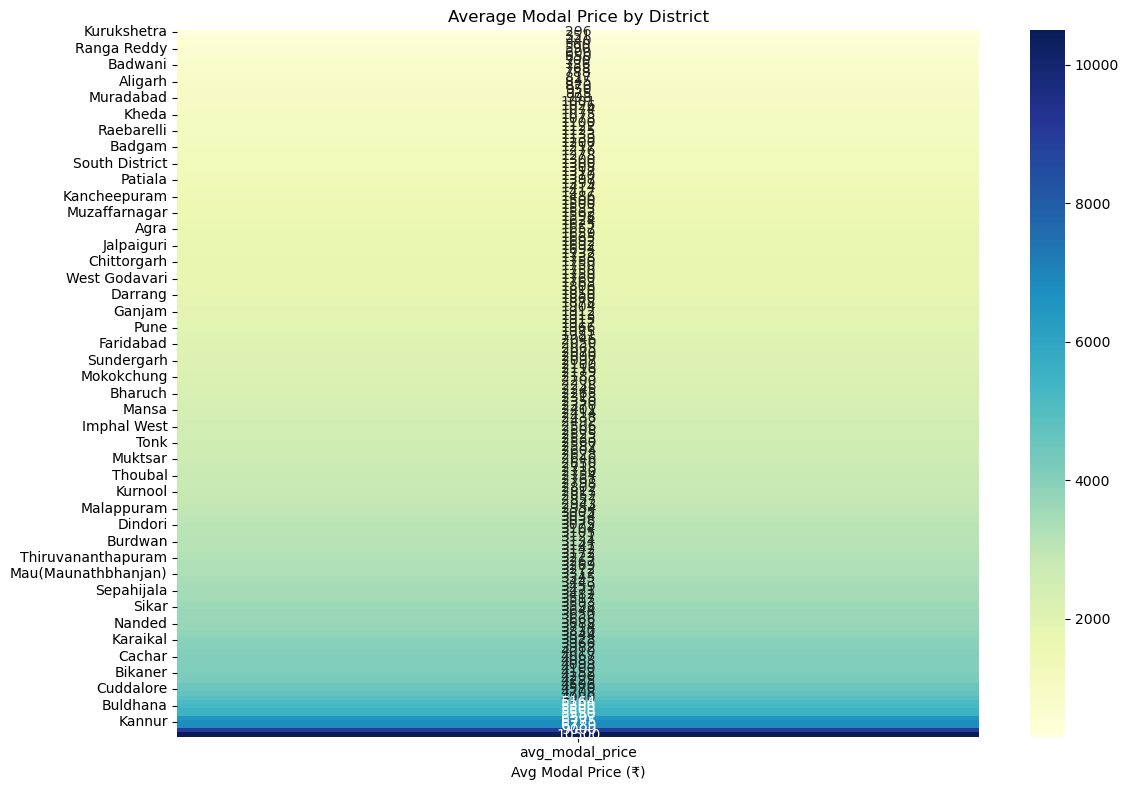

In [28]:
#Heatmap of Price Averages by District

plt.figure(figsize=(12,8))
pivot = market_summary.pivot_table(index='district', values='avg_modal_price', aggfunc='mean').sort_values('avg_modal_price')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Modal Price by District')
plt.ylabel('')
plt.xlabel('Avg Modal Price (₹)')
plt.tight_layout()
plt.show()

This heatmap helps identify which districts command higher prices on average—prime targets for your smart agri-tech app.
observations:
too many districts lests trim it down

In [29]:
# Select top 15 highest average modal price districts
top_districts = market_summary.groupby('district')['avg_modal_price'].mean().nlargest(15).sort_values()

# Create a subset of market_summary with just these districts
filtered = market_summary[market_summary['district'].isin(top_districts.index)]

# Average modal price again for clarity
heat_data = filtered.groupby('district')['avg_modal_price'].mean().sort_values().to_frame()

plt.figure(figsize=(10,6))
sns.heatmap(heat_data, cmap='Set2', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Avg Modal Price (₹)'})
plt.title('Top 15 Districts by Average Modal Price')
plt.xlabel('Avg Modal Price (₹)')
plt.ylabel('')
plt.tight_layout()
plt.show()

- Nagercoil(Kannyiakumari) are Tumkur are the highest-priced markets in the snapshot, with average modal prices above ₹10500, ₹9000. These are potentially high-value markets
- Bater, Barmer and erode are at the lower end, averaging around ₹4500. These might be smaller markets.
- In our context—evaluating markets for a smart crop disease detection app—districts with higher modal prices might be more open to adopting technology, since their crops could carry more financial risk if disease strikes.

In [30]:
# Load the shapefile (GeoPandas automatically reads supporting files)
gdf = gpd.read_file("2011_Dist.shp")

# Preview the first few rows and columns
print(gdf.columns)
gdf.head()

Index(['DISTRICT', 'ST_NM', 'ST_CEN_CD', 'DT_CEN_CD', 'censuscode',
       'geometry'],
      dtype='object')


DISTRICT           ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
0    Adilabad  Andhra Pradesh         28          1         532   
1        Agra   Uttar Pradesh          9         15         146   
2   Ahmadabad         Gujarat         24          7         474   
3  Ahmadnagar     Maharashtra         27         26         522   
4      Aizawl         Mizoram         15          3         283   

                                            geometry  
0  POLYGON ((78.84972 19.7601, 78.85102 19.75945,...  
1  POLYGON ((78.19803 27.4028, 78.19804 27.40278,...  
2  MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...  
3  POLYGON ((74.67333 19.9467, 74.67393 19.93509,...  
4  POLYGON ((92.98749 24.40453, 92.99107 24.40236...

In [31]:
gdf.columns

Index(['DISTRICT', 'ST_NM', 'ST_CEN_CD', 'DT_CEN_CD', 'censuscode',
       'geometry'],
      dtype='object')

In [32]:
# Lowercase + strip for consistency
gdf['district'] = gdf['DISTRICT'].str.lower().str.strip()
market_summary['district'] = market_summary['district'].str.lower().str.strip()

# Merge shapefile with your market data
merged = gdf.merge(market_summary, on='district', how='inner')  # inner to keep only matching districts
merged

DISTRICT                     ST_NM  ST_CEN_CD  DT_CEN_CD  \
0             Agra             Uttar Pradesh          9         15   
1             Agra             Uttar Pradesh          9         15   
2             Agra             Uttar Pradesh          9         15   
3             Agra             Uttar Pradesh          9         15   
4             Agra             Uttar Pradesh          9         15   
..             ...                       ...        ...        ...   
228        Vellore                Tamil Nadu         33          4   
229        Vellore                Tamil Nadu         33          4   
230  West Godavari            Andhra Pradesh         28         15   
231       Karaikal                Puducherry         34          4   
232  South Andaman  Andaman & Nicobar Island         35          3   

     censuscode                                           geometry  \
0           146  POLYGON ((78.19803 27.4028, 78.19804 27.40278,...   
1           146  POLYGON ((78.19803 27.4028, 78.19804 27.40278,...   
2           146  POLYGON ((78.19803 27.4028, 78.19804 27.40278,...   
3           146  POLYGON ((78.19803 27.4028, 78.19804 27.40278,...   
4           146  POLYGON ((78.19803 27.4028, 78.19804 27.40278,...   
..          ...                                                ...   
228         605  POLYGON ((79.78551 13.02213, 79.77011 13.01599...   
229         605  POLYGON ((79.78551 13.02213, 79.77011 13.01599...   
230         546  POLYGON ((81.72023 16.32845, 81.71887 16.32727...   
231         637  POLYGON ((79.76528 10.99681, 79.76963 10.99519...   
232         640  MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...   

          district                state      market  unique_commodities  \
0             agra        Uttar Pradesh     Achnera                  21   
1             agra        Uttar Pradesh   Fatehabad                  25   
2             agra        Uttar Pradesh     Jagnair                  19   
3             agra        Uttar Pradesh       Jarar                  19   
4             agra        Uttar Pradesh  Khairagarh                  23   
..             ...                  ...         ...                 ...   
228        vellore           Tamil Nadu     Kalavai                   1   
229        vellore           Tamil Nadu     Vellore                   9   
230  west godavari       Andhra Pradesh      Attili                   1   
231       karaikal          Pondicherry    Karaikal                   3   
232  south andaman  Andaman and Nicobar  Port Blair                  14   

     unique_varieties  avg_modal_price  std_modal_price  avg_max_price  \
0                  19      1567.619048      1134.115976    1610.000000   
1                  23      1652.400000      1171.815827    1708.000000   
2                  17      1892.105263      1309.306767    1936.842105   
3                  17      1295.789474      1127.437191    1335.789474   
4                  20      1825.000000      1247.290700    1869.130435   
..                ...              ...              ...            ...   
228                 2      1441.500000        16.263456    1453.000000   
229                 3      4680.900000      3185.954643    4783.400000   
230                 1      1760.000000         0.000000    1770.000000   
231                 7      3928.428571      3818.433093    3940.285714   
232                 6      6507.142857      2438.620129    7250.000000   

     avg_min_price  
0      1525.238095  
1      1612.000000  
2      1847.368421  
3      1252.105263  
4      1780.869565  
..             ...  
228    1429.500000  
229    4141.900000  
230    1750.000000  
231    3916.428571  
232    5707.142857  

[233 rows x 15 columns]

In [33]:
# Get India boundary by dissolving all districts
india_outline = gdf.dissolve(by='ST_NM')  # dissolving by state groups boundaries together

In [34]:
# Step 1: Create base map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot district-level modal price
merged.plot(
    column='avg_modal_price',
    cmap='YlOrRd',
    legend=True,
    legend_kwds={'label': "Avg Modal Price (₹)", 'shrink': 0.5},
    edgecolor='black',
    linewidth=0.3,
    ax=ax
)

# Label districts
for idx, row in merged.iterrows():
    ax.annotate(
        text=row['district'].title(),
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        fontsize=5.5,
        color='black'
    )

# Step 2: Get state geometries and centroids
state_centroids = gdf.dissolve(by='ST_NM').reset_index()
state_centroids['centroid'] = state_centroids['geometry'].centroid

# Label states
for _, row in state_centroids.iterrows():
    ax.text(
        x=row['centroid'].x,
        y=row['centroid'].y,
        s=row['ST_NM'],
        ha='center',
        fontsize=8,
        fontweight='bold',
        color='darkblue'
    )

# Overlay country outline
if hasattr(india_outline, "plot"):
    india_outline.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5)
else:
    gpd.GeoSeries([india_outline]).plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5)

ax.set_title('Avg Modal Price by District', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

indian geospatial plot observation:
- Tamil Nadu and Panjab have lots of districts with good avg modal price
- Goa and South Andaman have top avg modal price

# Model building 

In [35]:
# Select Features for Clustering
features = ['unique_commodities', 'unique_varieties', 'avg_modal_price',
            'std_modal_price', 'avg_max_price', 'avg_min_price']
X = market_summary[features]
X

unique_commodities  unique_varieties  avg_modal_price  std_modal_price  \
0                    14                 6      6507.142857      2438.620129   
1                     1                 1       620.000000         0.000000   
2                     1                 1       300.000000         0.000000   
3                     1                 1       760.000000         0.000000   
4                     3                 3      2816.666667      1544.614299   
..                  ...               ...              ...              ...   
318                   9                 1      3067.777778      3071.619189   
319                  11                 6      3622.727273      3387.057989   
320                  11                11      3120.833333      2119.761815   
321                   3                 3      2916.666667      2109.699821   
322                   3                 3      3366.666667      1205.542755   

     avg_max_price  avg_min_price  
0      7250.000000    5707.142857  
1       960.000000     400.000000  
2       500.000000     200.000000  
3      1120.000000     400.000000  
4      2883.333333    2733.333333  
..             ...            ...  
318    3130.000000    3007.777778  
319    3691.363636    3525.454545  
320    3200.833333    2998.333333  
321    2973.333333    2860.000000  
322    3425.000000    3308.333333  

[323 rows x 6 columns]

In [36]:
#Standardize the Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.05776714,  0.35483948,  2.3587536 ,  1.21556545,  2.51784136,
         2.11925385],
       [-0.75808086, -0.60668026, -1.21398684, -0.93599417, -1.03183353,
        -1.30438695],
       [-0.75808086, -0.60668026, -1.40818579, -0.93599417, -1.29142819,
        -1.43340706],
       ...,
       [ 0.63872529,  1.31635923,  0.30369816,  0.93424132,  0.23274991,
         0.37179932],
       [-0.47871963, -0.22207236,  0.17979518,  0.92536377,  0.10436342,
         0.28256041],
       [-0.47871963, -0.22207236,  0.45288745,  0.12763894,  0.35925528,
         0.5717805 ]])

In [37]:
#Apply PCA for Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Optional: create a DataFrame for easy plotting later
pca_df = market_summary[['state', 'district', 'market']].copy()
pca_df['PC1'] = X_pca[:, 0]
pca_df['PC2'] = X_pca[:, 1]


In [38]:
plt.figure(figsize=(12, 8))

plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, s=40, color='slateblue')

# Add market name labels
for _, row in pca_df.iterrows():
    plt.annotate(
        text=row['market'].title(),
        xy=(row['PC1'], row['PC2']),
        fontsize=6,
        alpha=0.7,
        ha='center'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Market Features (Labeled by Market)')
plt.grid(True)
plt.tight_layout()
plt.show()

# we can see few clusters forming already

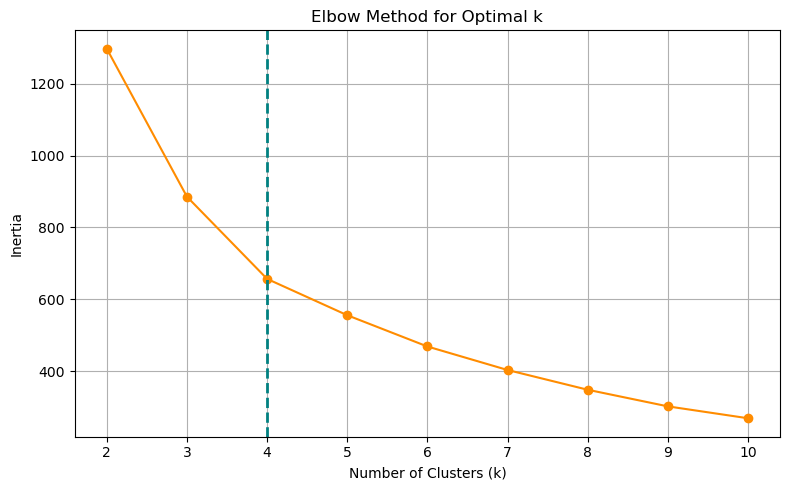

In [39]:
# Elbow Method to Choose Number of Clusters
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', color='darkorange')
plt.axvline(x=4, color='teal', linestyle='--', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='s', color='seagreen')
plt.axvline(x=4, linestyle='--', color='gray', label='Chosen k = 4')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs Cluster Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# The closer the score is to 1, the better defined the clusters.


# K-means clustering

In [41]:
#Assign Clusters to Market Summary
kmeans = KMeans(n_clusters=4, random_state=42)
market_summary['cluster'] = kmeans.fit_predict(X_scaled)

In [42]:
market_summary

state            district             market  \
0    Andaman and Nicobar       south andaman         Port Blair   
1         Andhra Pradesh             chittor           Kalikiri   
2         Andhra Pradesh             chittor    Mulakalacheruvu   
3         Andhra Pradesh             chittor         Vayalapadu   
4         Andhra Pradesh             kurnool      Banaganapalli   
..                   ...                 ...                ...   
318          West Bengal            puruliya         Balarampur   
319          West Bengal            puruliya            Purulia   
320          West Bengal  sounth 24 parganas  Baruipur(Canning)   
321          West Bengal      uttar dinajpur           Islampur   
322          West Bengal      uttar dinajpur            Raiganj   

     unique_commodities  unique_varieties  avg_modal_price  std_modal_price  \
0                    14                 6      6507.142857      2438.620129   
1                     1                 1       620.000000         0.000000   
2                     1                 1       300.000000         0.000000   
3                     1                 1       760.000000         0.000000   
4                     3                 3      2816.666667      1544.614299   
..                  ...               ...              ...              ...   
318                   9                 1      3067.777778      3071.619189   
319                  11                 6      3622.727273      3387.057989   
320                  11                11      3120.833333      2119.761815   
321                   3                 3      2916.666667      2109.699821   
322                   3                 3      3366.666667      1205.542755   

     avg_max_price  avg_min_price  cluster  
0      7250.000000    5707.142857        0  
1       960.000000     400.000000        3  
2       500.000000     200.000000        3  
3      1120.000000     400.000000        3  
4      2883.333333    2733.333333        1  
..             ...            ...      ...  
318    3130.000000    3007.777778        1  
319    3691.363636    3525.454545        1  
320    3200.833333    2998.333333        1  
321    2973.333333    2860.000000        1  
322    3425.000000    3308.333333        1  

[323 rows x 10 columns]

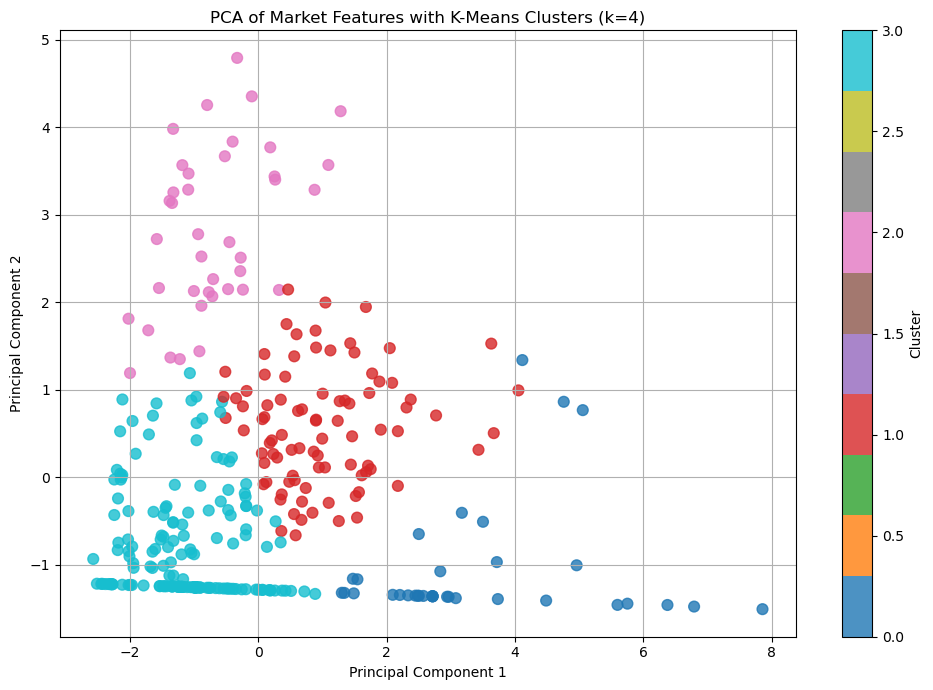

In [43]:
#Visualize Clusters in PCA Space
pca_df['cluster'] = market_summary['cluster']  # Sync labels with PCA points

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'], 
    c=pca_df['cluster'], cmap='tab10', 
    s=60, alpha=0.8
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Market Features with K-Means Clusters (k=4)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

#we can clearly see 4 clusters forming

# Cluster Profiling

In [44]:
market_summary.groupby('cluster')[features].mean().round(1)

unique_commodities  unique_varieties  avg_modal_price  \
cluster                                                          
0                       1.6               1.4           6013.4   
1                       8.2               3.7           3367.1   
2                      19.8              15.9           2093.9   
3                       3.3               2.2           1602.2   

         std_modal_price  avg_max_price  avg_min_price  
cluster                                                 
0                  558.8         6375.5         5570.5  
1                 2282.6         3538.1         3163.2  
2                 1583.5         2225.6         1933.6  
3                  375.6         1735.2         1450.7

In [45]:
# Ensure both 'district' columns are lowercase and stripped
market_summary['district'] = market_summary['district'].str.lower().str.strip()
merged['district'] = merged['district'].str.lower().str.strip()

# Merge cluster info
merged = merged.merge(
    market_summary[['district', 'cluster']],
    on='district',
    how='left'
)

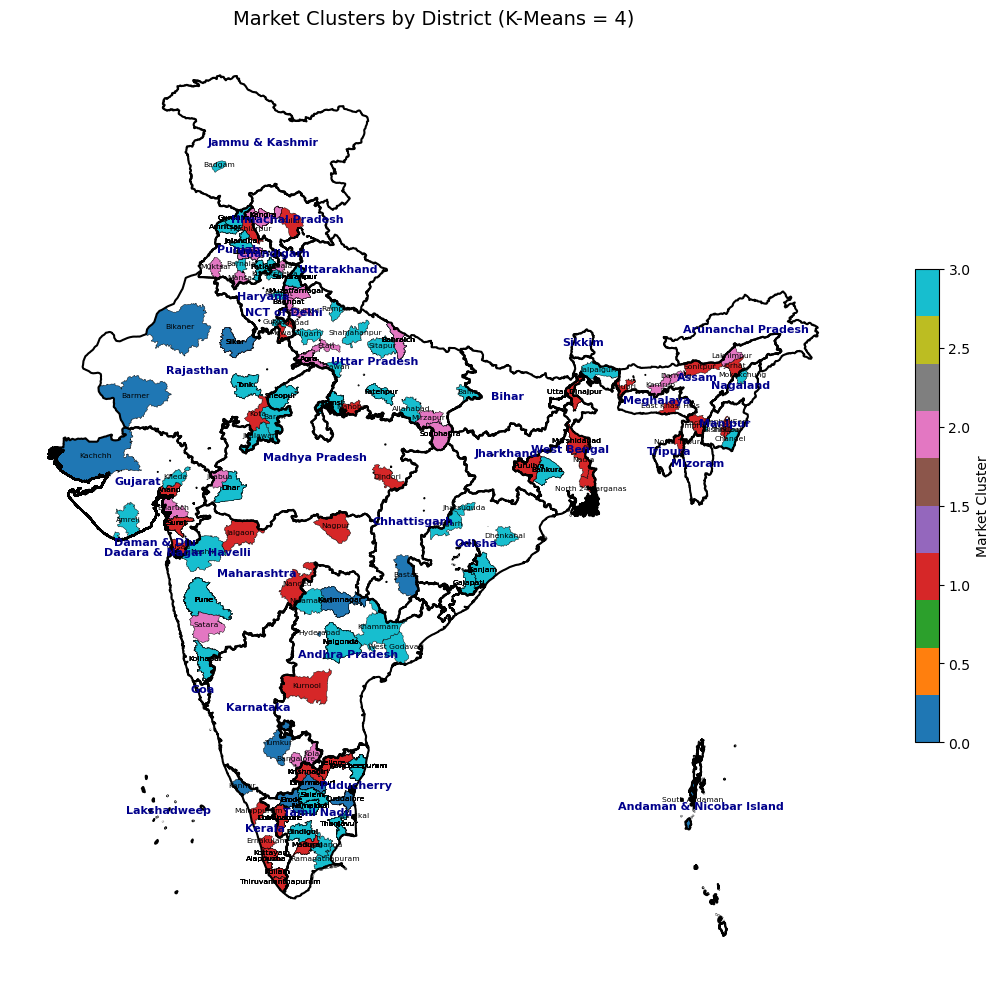

In [46]:
# Step 1: Create base map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot district-level modal price
merged.plot(
    column='cluster',
    cmap='tab10',
    legend=True,
    legend_kwds={'label': "Market Cluster", 'shrink': 0.5},
    edgecolor='black',
    linewidth=0.3,
    ax=ax
)

# Label districts
for idx, row in merged.iterrows():
    ax.annotate(
        text=row['district'].title(),
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        fontsize=5.5,
        color='black'
    )

# Step 2: Get state geometries and centroids
state_centroids = gdf.dissolve(by='ST_NM').reset_index()
state_centroids['centroid'] = state_centroids['geometry'].centroid

# Label states
for _, row in state_centroids.iterrows():
    ax.text(
        x=row['centroid'].x,
        y=row['centroid'].y,
        s=row['ST_NM'],
        ha='center',
        fontsize=8,
        fontweight='bold',
        color='darkblue'
    )

# Overlay country outline
if hasattr(india_outline, "plot"):
    india_outline.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5)
else:
    gpd.GeoSeries([india_outline]).plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5)

ax.set_title('Market Clusters by District (K-Means = 4)', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

In [47]:
market_summary.groupby('cluster')[features].mean().round(1)

unique_commodities  unique_varieties  avg_modal_price  \
cluster                                                          
0                       1.6               1.4           6013.4   
1                       8.2               3.7           3367.1   
2                      19.8              15.9           2093.9   
3                       3.3               2.2           1602.2   

         std_modal_price  avg_max_price  avg_min_price  
cluster                                                 
0                  558.8         6375.5         5570.5  
1                 2282.6         3538.1         3163.2  
2                 1583.5         2225.6         1933.6  
3                  375.6         1735.2         1450.7

In [48]:
# First ensure consistent formatting
df_no_outliers['district'] = df_no_outliers['district'].str.lower().str.strip()
df_no_outliers['market'] = df_no_outliers['market'].str.lower().str.strip()

market_summary['district'] = market_summary['district'].str.lower().str.strip()
market_summary['market'] = market_summary['market'].str.lower().str.strip()

# Merge cluster info from market_summary into df_no_outliers
df_no_outliers = df_no_outliers.merge(
    market_summary[['state', 'district', 'market', 'cluster']],
    on=['state', 'district', 'market'],
    how='left'
)

In [49]:
df_no_outliers

state        district      market              commodity  \
0     Andaman and Nicobar   south andaman  port blair             Amaranthus   
1     Andaman and Nicobar   south andaman  port blair         Banana - Green   
2     Andaman and Nicobar   south andaman  port blair  Bhindi(Ladies Finger)   
3     Andaman and Nicobar   south andaman  port blair           Bitter gourd   
4     Andaman and Nicobar   south andaman  port blair           Bottle gourd   
...                   ...             ...         ...                    ...   
2150          West Bengal  uttar dinajpur    islampur                 Potato   
2151          West Bengal  uttar dinajpur    islampur                   Rice   
2152          West Bengal  uttar dinajpur     raiganj                   Jute   
2153          West Bengal  uttar dinajpur     raiganj                   Rice   
2154          West Bengal  uttar dinajpur     raiganj                  Wheat   

             variety arrival_date  min_price  max_price  modal_price  cluster  
0         Amaranthus   2019-03-04       6000       8000         7000        0  
1     Banana - Green   2019-03-04       4500       5500         5000        0  
2             Bhindi   2019-03-04       6000       8000         7000        0  
3              Other   2019-03-04       6000       8000         7000        0  
4              Other   2019-03-04       3000       4000         3500        0  
...              ...          ...        ...        ...          ...      ...  
2150           Jyoti   2019-03-04        530        570          550        1  
2151           Other   2019-03-04       3550       3650         3600        1  
2152            TD-5   2019-03-04       4400       4600         4500        1  
2153           Other   2019-03-04       3450       3550         3500        1  
2154          Kalyan   2019-03-04       2075       2125         2100        1  

[2155 rows x 10 columns]

In [50]:
#Cluster × Commodity Heatmap

plt.figure(figsize=(30,18))
pivot = df_no_outliers.pivot_table(index='commodity', columns='cluster', values='modal_price', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu', annot_kws={'size': 7})
plt.title('Average Modal Price per Commodity Across Clusters')
plt.yticks(fontsize=8)
plt.xticks(fontsize=9)
plt.tight_layout()
plt.show()

In [51]:
import plotly.express as px
import pandas as pd

# Prepare pivot table
pivot = df_no_outliers.pivot_table(
    index='commodity',
    columns='cluster',
    values='modal_price',
    aggfunc='mean'
).round(0)

# Convert pivot table to long-form DataFrame for Plotly
pivot_reset = pivot.reset_index().melt(id_vars='commodity', var_name='cluster', value_name='avg_modal_price')

# Create heatmap
fig = px.imshow(
    pivot.values,
    x=pivot.columns,
    y=pivot.index,
    color_continuous_scale='YlGnBu',
    labels=dict(x='Cluster', y='Commodity', color='Avg Modal Price (₹)'),
    text_auto=True
)

fig.update_layout(
    title='Average Modal Price per Commodity Across Clusters',
    xaxis_title='Cluster',
    yaxis_title='Commodity',
    autosize=False,
    width=1000,
    height=1200
)

fig.update_traces(textfont_size=10)
fig.show()

In [52]:
market_summary.groupby('cluster')[features].mean().round(1)

unique_commodities  unique_varieties  avg_modal_price  \
cluster                                                          
0                       1.6               1.4           6013.4   
1                       8.2               3.7           3367.1   
2                      19.8              15.9           2093.9   
3                       3.3               2.2           1602.2   

         std_modal_price  avg_max_price  avg_min_price  
cluster                                                 
0                  558.8         6375.5         5570.5  
1                 2282.6         3538.1         3163.2  
2                 1583.5         2225.6         1933.6  
3                  375.6         1735.2         1450.7

In [ ]:
''' 
There are 4 clusters or segments
Clusters -         Profile Summary                               -      Suggested Name

  0      - Very low diversity, high prices, stable               - Premium, Focused Markets

  1      - Moderate diversity, high volatility                   - Volatile Multi-Crop Hubs

  2      - High diversity, moderate pricing, moderate volatility - Diverse & Dynamic Markets

  3      - Low diversity, lowest prices, stable                  - Affordable, Low-Variety Zones
'''